<a href="https://colab.research.google.com/github/wayneotemah/Learing-TensorFlow/blob/main/03_intro_to_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to computer vision and convolutional neural net

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")

zip_ref.extractall()
zip_ref.close()

--2023-05-20 14:13:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.7MB/s    in 3.7s    

2023-05-20 14:13:58 (28.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# inspect the data

In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# walk through pizza_steak dir and list number of images

for dirpath, dirname, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in '{dirpath}' ")

There are 2 directories and 0 images in 'pizza_steak' 
There are 2 directories and 0 images in 'pizza_steak/test' 
There are 0 directories and 250 images in 'pizza_steak/test/steak' 
There are 0 directories and 250 images in 'pizza_steak/test/pizza' 
There are 2 directories and 0 images in 'pizza_steak/train' 
There are 0 directories and 750 images in 'pizza_steak/train/steak' 
There are 0 directories and 750 images in 'pizza_steak/train/pizza' 


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# geting ht eclass names programmmaticly

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# lets visualise a image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

def view_random_image(target_dir,target_class):
  # set up target directories view images 
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # read in the image and plot the image
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"immage shape: {img.shape}") # show the shape of the image

  return img


['712149.jpg']
immage shape: (512, 382, 3)


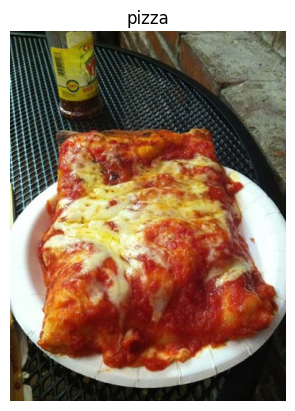

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[22, 31, 28],
        [23, 32, 29],
        [24, 33, 28],
        ...,
        [74, 62, 36],
        [73, 61, 35],
        [73, 59, 32]],

       [[44, 55, 51],
        [42, 53, 49],
        [41, 52, 48],
        ...,
        [72, 60, 34],
        [72, 60, 34],
        [73, 59, 33]],

       [[82, 94, 90],
        [78, 90, 86],
        [75, 87, 83],
        ...,
        [73, 61, 37],
        [74, 62, 38],
        [75, 60, 37]],

       ...,

       [[68, 49, 17],
        [68, 49, 19],
        [65, 46, 16],
        ...,
        [14, 13,  8],
        [12, 11,  6],
        [10,  9,  4]],

       [[69, 50, 18],
        [70, 51, 19],
        [68, 49, 19],
        ...,
        [13, 12,  7],
        [12, 11,  6],
        [10,  9,  4]],

       [[70, 51, 19],
        [74, 55, 23],
        [73, 54, 24],
        ...,
        [13, 12,  7],
        [12, 11,  6],
        [11, 10,  5]]], dtype=uint8)>

In [ ]:
# preprosesing the data

img_normal = img/img.max()
img_normal

array([[[0.08627451, 0.12156863, 0.10980392],
        [0.09019608, 0.1254902 , 0.11372549],
        [0.09411765, 0.12941176, 0.10980392],
        ...,
        [0.29019608, 0.24313725, 0.14117647],
        [0.28627451, 0.23921569, 0.1372549 ],
        [0.28627451, 0.23137255, 0.1254902 ]],

       [[0.17254902, 0.21568627, 0.2       ],
        [0.16470588, 0.20784314, 0.19215686],
        [0.16078431, 0.20392157, 0.18823529],
        ...,
        [0.28235294, 0.23529412, 0.13333333],
        [0.28235294, 0.23529412, 0.13333333],
        [0.28627451, 0.23137255, 0.12941176]],

       [[0.32156863, 0.36862745, 0.35294118],
        [0.30588235, 0.35294118, 0.3372549 ],
        [0.29411765, 0.34117647, 0.3254902 ],
        ...,
        [0.28627451, 0.23921569, 0.14509804],
        [0.29019608, 0.24313725, 0.14901961],
        [0.29411765, 0.23529412, 0.14509804]],

       ...,

       [[0.26666667, 0.19215686, 0.06666667],
        [0.26666667, 0.19215686, 0.0745098 ],
        [0.25490196, 0

# CNN Architectur End_to_end example

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        )



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 246ms/step - loss: 0.5817 - accuracy: 0.6893 - val_loss: 0.4029 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4134 - accuracy: 0.8220 - val_loss: 0.3190 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3863 - accuracy: 0.8347 - val_loss: 0.3212 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3102 - accuracy: 0.8720 - val_loss: 0.3596 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.2546 - accuracy: 0.9067 - val_loss: 0.3728 - val_accuracy: 0.8400


# CNN Break down 

## loading data with the imageGenerator in tf

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data)

47

## make baseline

**Note**: in deep learining there are many amount of architecture you could create. Best practise is to start simple and see if it works on you data and then introduce complexity as required (e.g look are which current model is performing best in the field for your problem)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
# create the model
model_2 = Sequential([
    Conv2D(filters =10,
           kernel_size=3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer = Adam(),
              metrics=["accuracy"])

In [ ]:
# model summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 13s 237ms/step - loss: 1.0405 - accuracy: 0.6773 - val_loss: 0.4725 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4493 - accuracy: 0.7927 - val_loss: 0.4904 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3372 - accuracy: 0.8667 - val_loss: 0.4248 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.2117 - accuracy: 0.9307 - val_loss: 0.3592 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.0828 - accuracy: 0.9833 - val_loss: 0.4595 - val_accuracy: 0.8260


## evaluating the baseline model

Plot loss curve

<Axes: >

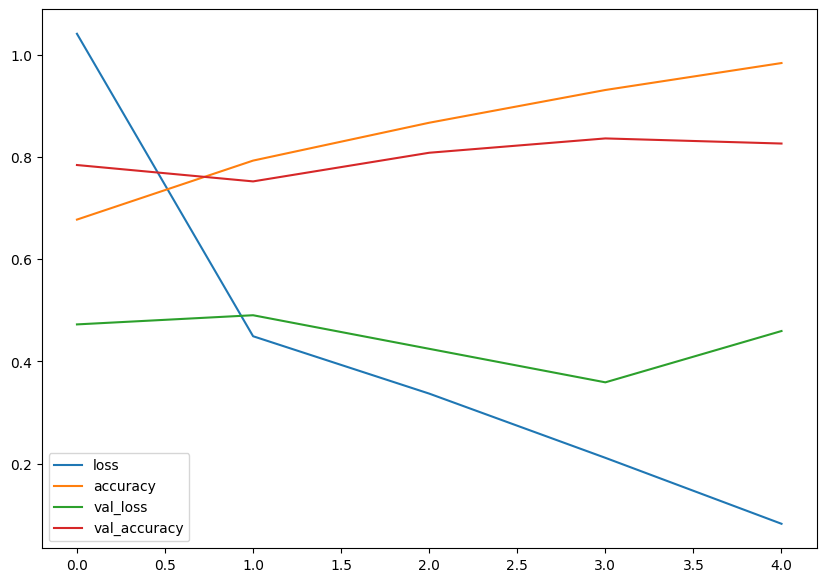

In [ ]:
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [ ]:
#  plot in curves seperatly
import matplotlib.pyplot as plt

def  plot_loss_curves(history):
  '''
  return seperate loss curves for trainning and validation metrics 
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

    # plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="accuracy")
  plt.plot(epochs,val_accuracy,label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()
  


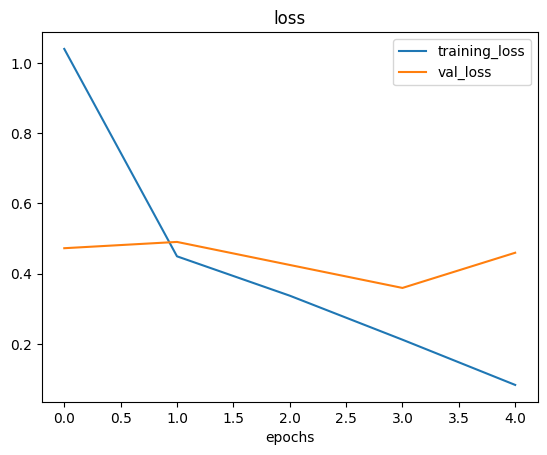

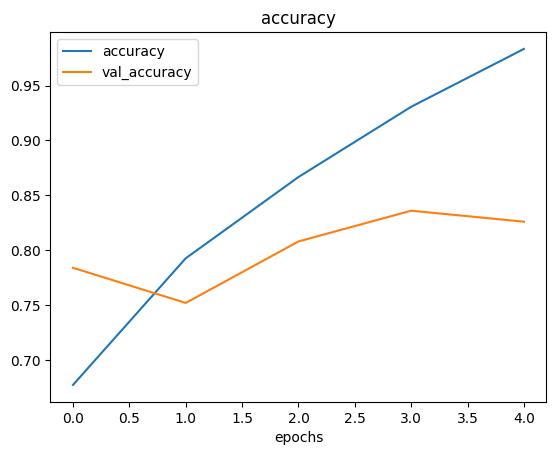

In [ ]:
# plot loss

plot_loss_curves(history_2)

in ideal, the validation curve and the training curve should move in the same direcion, if not, this means that the data is over fitting and is bad

## Reducing over fitting

to improve generalization:

> Create the baseline
> Beat the baseline with overfitting
> Reduce overfitting of the new model 

Ways to induce ovefitting:

1. Increase the  number of conv Layer
2. increase the number of conv filters
3. add another dens layerto the output of the flatten layer

Ways to reduce overfitting:
1. Add data augmentation
2. add regularization layers(maxPool)
3. Add more data...

## add regularization layers(maxPool)

In [ ]:
# create the model
model_3 = Sequential([
    Conv2D(filters =10,
           kernel_size=3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224,224,3)),
    MaxPool2D(pool_size=2),

    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),

    Conv2D(10,3,activation = "relu"),
    MaxPool2D(pool_size=2),

    Flatten(),
    Dense(1,activation = "sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer = Adam(),
              metrics=["accuracy"])


history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 12s 223ms/step - loss: 0.6266 - accuracy: 0.6413 - val_loss: 0.5175 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 0.5149 - accuracy: 0.7513 - val_loss: 0.4613 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4545 - accuracy: 0.7933 - val_loss: 0.3862 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4249 - accuracy: 0.8100 - val_loss: 0.3841 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 17s 365ms/step - loss: 0.3919 - accuracy: 0.8300 - val_loss: 0.3620 - val_accuracy: 0.8300


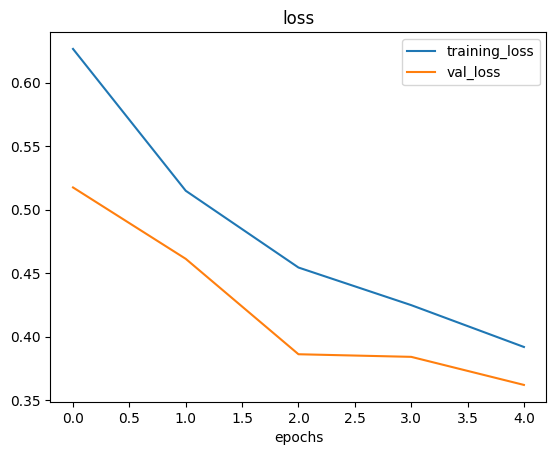

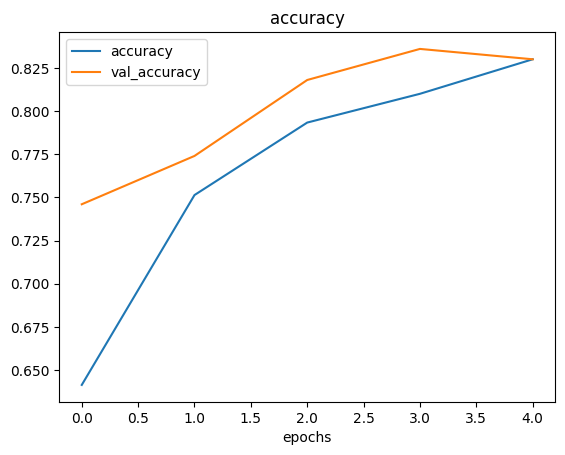

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

## data augmentation 

 The purpose of data augmentation is to improve the model's performance and generalization by providing more diverse and varied examples for training.


 Data augmentation is a technique used in machine learning and computer vision to artificially increase the size of a training dataset by applying various transformations to the existing data

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)
     

In [ ]:

# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# lets look at the augmented data

# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #

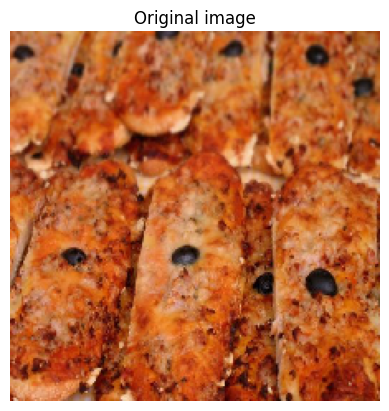

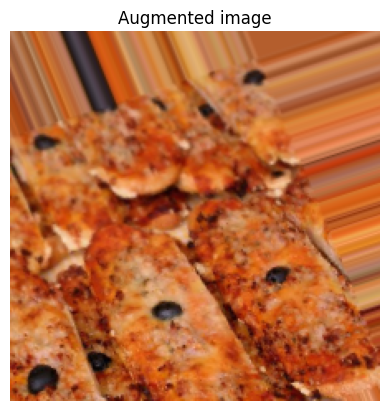

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# let model  with augmented data

# create the model
model_4 = Sequential([
    Conv2D(filters =10,
           kernel_size=3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224,224,3)),
    MaxPool2D(),

    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),

    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),

    Flatten(),
    Dense(1,activation = "sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer = Adam(),
              metrics=["accuracy"])


history_4 = model_4.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 679ms/step - loss: 0.7487 - accuracy: 0.5160 - val_loss: 0.6522 - val_accuracy: 0.6200
Epoch 2/5
47/47 [==============================] - 31s 673ms/step - loss: 0.6345 - accuracy: 0.6800 - val_loss: 0.7493 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 24s 513ms/step - loss: 0.6974 - accuracy: 0.5533 - val_loss: 0.6155 - val_accuracy: 0.6600
Epoch 4/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6336 - accuracy: 0.6553 - val_loss: 0.5344 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 24s 507ms/step - loss: 0.5894 - accuracy: 0.7053 - val_loss: 0.4740 - val_accuracy: 0.8000


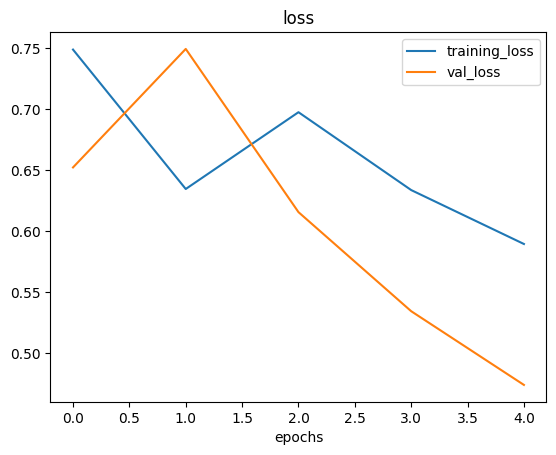

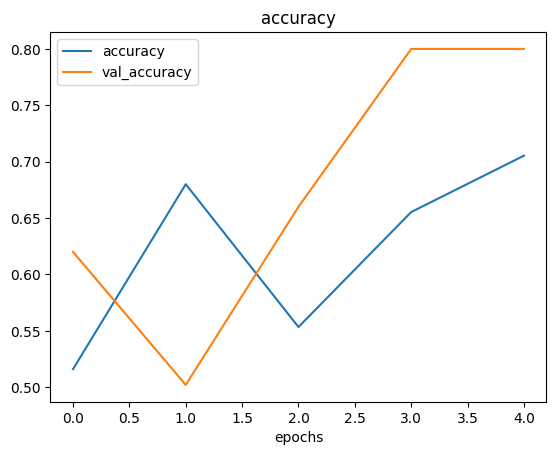

In [ ]:
# Check the models training curves
plot_loss_curves(history_4)

In [ ]:
# lets shuffle the training augmented data and train another model then see what happens


train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# let model  with augmented data

# create the model
model_5 = Sequential([
    Conv2D(filters =10,
           kernel_size=3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224,224,3)),
    MaxPool2D(),

    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),

    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),

    Flatten(),
    Dense(1,activation = "sigmoid")
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
              optimizer = Adam(),
              metrics=["accuracy"])


history_5 = model_5.fit(train_data_augmented_shuffled, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 554ms/step - loss: 0.6711 - accuracy: 0.5873 - val_loss: 0.5240 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 26s 561ms/step - loss: 0.5640 - accuracy: 0.7233 - val_loss: 0.4341 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 25s 529ms/step - loss: 0.5492 - accuracy: 0.7320 - val_loss: 0.4779 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 25s 525ms/step - loss: 0.5434 - accuracy: 0.7380 - val_loss: 0.4280 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.5282 - accuracy: 0.7433 - val_loss: 0.4045 - val_accuracy: 0.8280


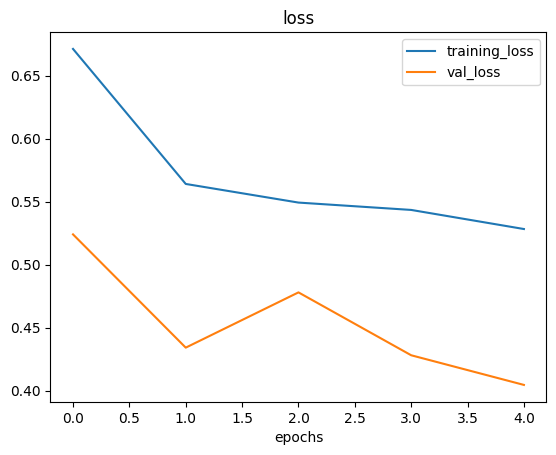

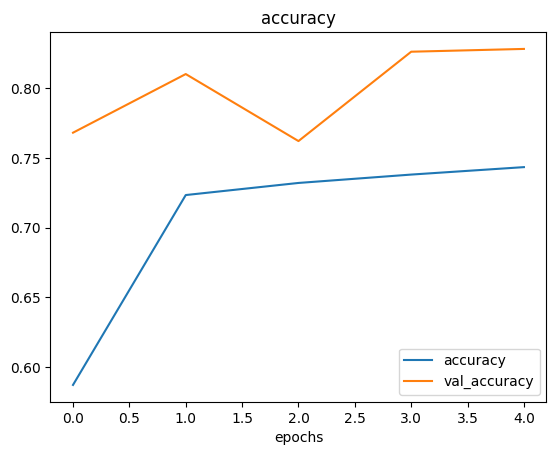

In [ ]:
plot_loss_curves(history_5)

## repeate unitll it okay

In [ ]:
model_6 = Sequential([
    Conv2D(filters =32,
           kernel_size=3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224,224,3)),
    Dense(32,activation="relu"),

    Conv2D(filters =32,activation = "relu",kernel_size=3,),
    Dense(32,activation="relu"),
    MaxPool2D(),

    Conv2D(filters =32,activation = "relu",kernel_size=3,),
    Dense(32,activation="relu"),

    Conv2D(filters =32,activation = "relu",kernel_size=3,),
    Dense(32,activation="relu"),
    MaxPool2D(),

    Flatten(),
    Dense(1,activation = "sigmoid")      
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
              optimizer = Adam(),
              metrics=["accuracy"])


history_6 = model_6.fit(train_data_augmented_shuffled, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 35s 610ms/step - loss: 0.6638 - accuracy: 0.6073 - val_loss: 0.5374 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 26s 560ms/step - loss: 0.5386 - accuracy: 0.7273 - val_loss: 0.4849 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 26s 555ms/step - loss: 0.4917 - accuracy: 0.7713 - val_loss: 0.3786 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 32s 691ms/step - loss: 0.5020 - accuracy: 0.7567 - val_loss: 0.3537 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 30s 647ms/step - loss: 0.4662 - accuracy: 0.7893 - val_loss: 0.3924 - val_accuracy: 0.8300


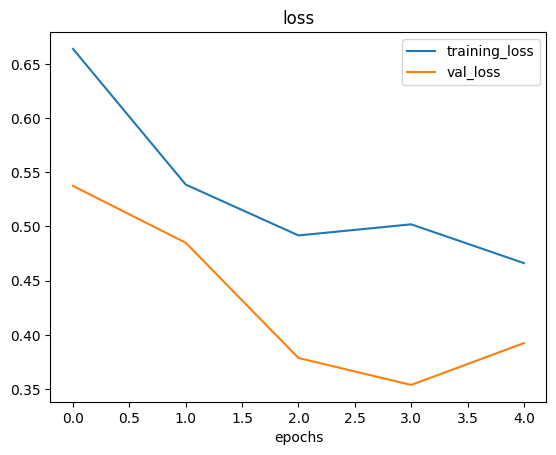

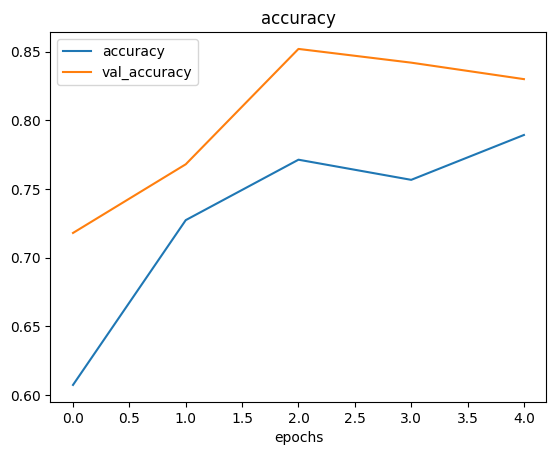

In [ ]:
plot_loss_curves(history_6)

# Lets predict using the model

In [ ]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTivUzvxNRSr-Bpikd47jDjmE42huHUQf_NCldSV4YQs_T8qXlm-ypoZYeCcZN1ke23dqg

--2023-05-20 14:26:53--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTivUzvxNRSr-Bpikd47jDjmE42huHUQf_NCldSV4YQs_T8qXlm-ypoZYeCcZN1ke23dqg
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.127.101, 108.177.127.139, 108.177.127.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.127.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10175 (9.9K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcTivUzvxNRSr-Bpikd47jDjmE42huHUQf_NCldSV4YQs_T8qXlm-ypoZYeCcZN1ke23dqg’

images?q=tbn:ANd9Gc 100%[===================>]   9.94K  --.-KB/s    in 0s      

2023-05-20 14:26:53 (85.3 MB/s) - ‘images?q=tbn:ANd9GcTivUzvxNRSr-Bpikd47jDjmE42huHUQf_NCldSV4YQs_T8qXlm-ypoZYeCcZN1ke23dqg’ saved [10175/10175]



(-0.5, 299.5, 167.5, -0.5)

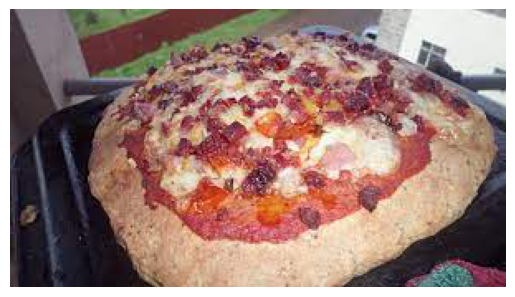

In [ ]:
# import matpoltlib.image as mpimg

pizza = mpimg.imread("kenyan_pizza")
plt.imshow(pizza)
plt.axis(False)

In [ ]:
pizza.shape

(168, 300, 3)

In [ ]:
model_6.predict(pizza)

ValueError: ignored

the image needs preprocessing for it to work

In [ ]:

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # increase the dimentidimentioins to 4 for tf processing


  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
kenyan_pizza = load_and_prep_image("kenyan_pizza")
kenyan_pizza.shape

TensorShape([224, 224, 3])

In [ ]:
pred = model_6.predict(tf.expand_dims(kenyan_pizza,axis=0))
pred


1/1 [==============================] - 0s 23ms/step


array([[0.20366766]], dtype=float32)

lets make the output/predictioin metter interptared by making a function

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class= class_names[int(tf.round(pred))]
pred_class

'pizza'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 94ms/step


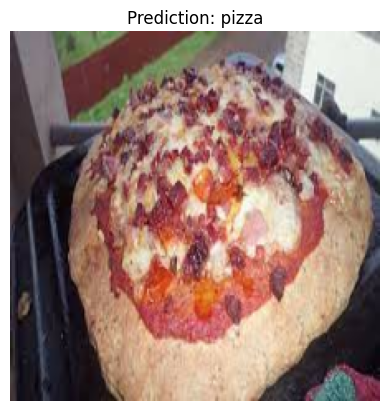

In [ ]:
pred_and_plot(model_6,"kenyan_pizza",class_names)

In [ ]:
!wget https://media-cdn.tripadvisor.com/media/photo-s/0e/d5/a6/99/prime-cut-steak-grilled.jpg

--2023-05-20 14:59:34--  https://media-cdn.tripadvisor.com/media/photo-s/0e/d5/a6/99/prime-cut-steak-grilled.jpg
Resolving media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)... 151.101.2.38, 151.101.66.38, 151.101.130.38, ...
Connecting to media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)|151.101.2.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50772 (50K) [image/jpeg]
Saving to: ‘prime-cut-steak-grilled.jpg.1’

prime-cut-steak-gri 100%[===================>]  49.58K  --.-KB/s    in 0.004s  

2023-05-20 14:59:34 (12.5 MB/s) - ‘prime-cut-steak-grilled.jpg.1’ saved [50772/50772]



1/1 [==============================] - 0s 93ms/step


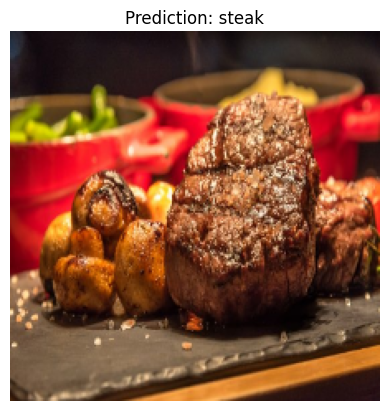

In [ ]:
pred_and_plot(model_6,"prime-cut-steak-grilled.jpg",class_names)

1/1 [==============================] - 0s 24ms/step


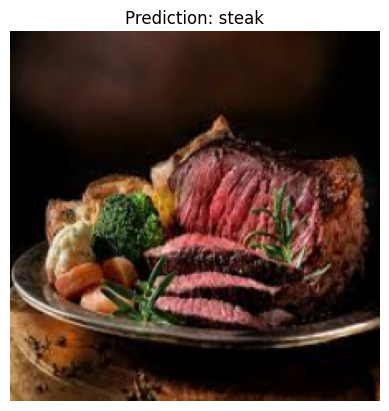

In [ ]:
pred_and_plot(model_6,"images.jpg",class_names)